
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations and good luck! 😊 
    

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, I am a reviewer on this project. 

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content, however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! There're just a couple of issues, but it will not take much time. If you have any questions, feel free to ask.
    
    
    

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, we still need such things as introduction and a title. Please, do not forget about them.
    
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Good! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Please do not forget about titles :)
</div>

**Introcution**
The goal of this project is to develop a deep learning model that can predict the age of a person from their facial image. The dataset contains 7,600 facial images, each associated with a real age label. Given the large size of the dataset, we utilize a generator to efficiently handle and process the images during training. This report covers the steps involved in data preprocessing, model building, training, and evaluation.

## Initialization

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
labels_path = '/datasets/faces/labels.csv'
photos_path = '/datasets/faces/final_files/'

In [4]:
data = pd.read_csv(labels_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


In [5]:
print(data.describe())

          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000


In [6]:
print(data['real_age'].describe())

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


In [7]:
datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)

In [8]:
mode_age = data['real_age'].mode()[0]
print(f"Mode (most frequent age): {mode_age}")

Mode (most frequent age): 30


In [9]:
bins = range(0, 101, 10)
binned_ages = pd.cut(data['real_age'], bins=bins, right=False, include_lowest=True)

age_distribution = binned_ages.value_counts(sort=False)
print(age_distribution)

[0, 10)       663
[10, 20)     1213
[20, 30)     2075
[30, 40)     1564
[40, 50)      940
[50, 60)      615
[60, 70)      279
[70, 80)      130
[80, 90)       78
[90, 100)      33
Name: real_age, dtype: int64


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Without a conclusion it is not quite clear why you create these variables.     
    
</div>

## EDA

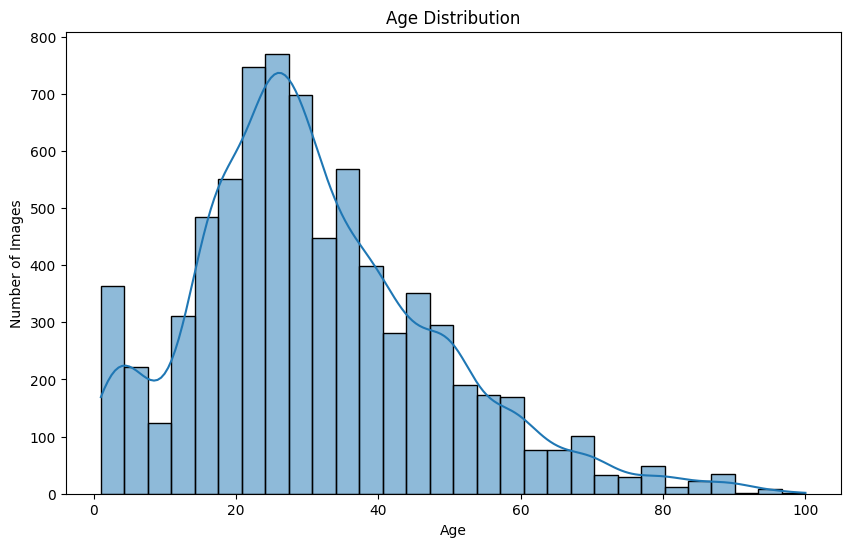

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['real_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Images')
plt.show()


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice chart 👍 


</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
What can you say about the distribution? 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Very good!     
</div>

The age distribution of the dataset, as shown by the histogram, reveals key insights. There is a noticeable central tendency indicating the most common age range. The spread of the data suggests a diverse age range, though specific peaks indicate some ages are more frequent than others. The shape of the distribution can highlight any skewness, with potential right or left skewness pointing to a predominance of younger or older ages, respectively. Additionally, the kurtosis of the distribution can show how clustered the ages are around the central value, with high peaks indicating a concentration of data points around the mean age.

Found 7591 validated image filenames.


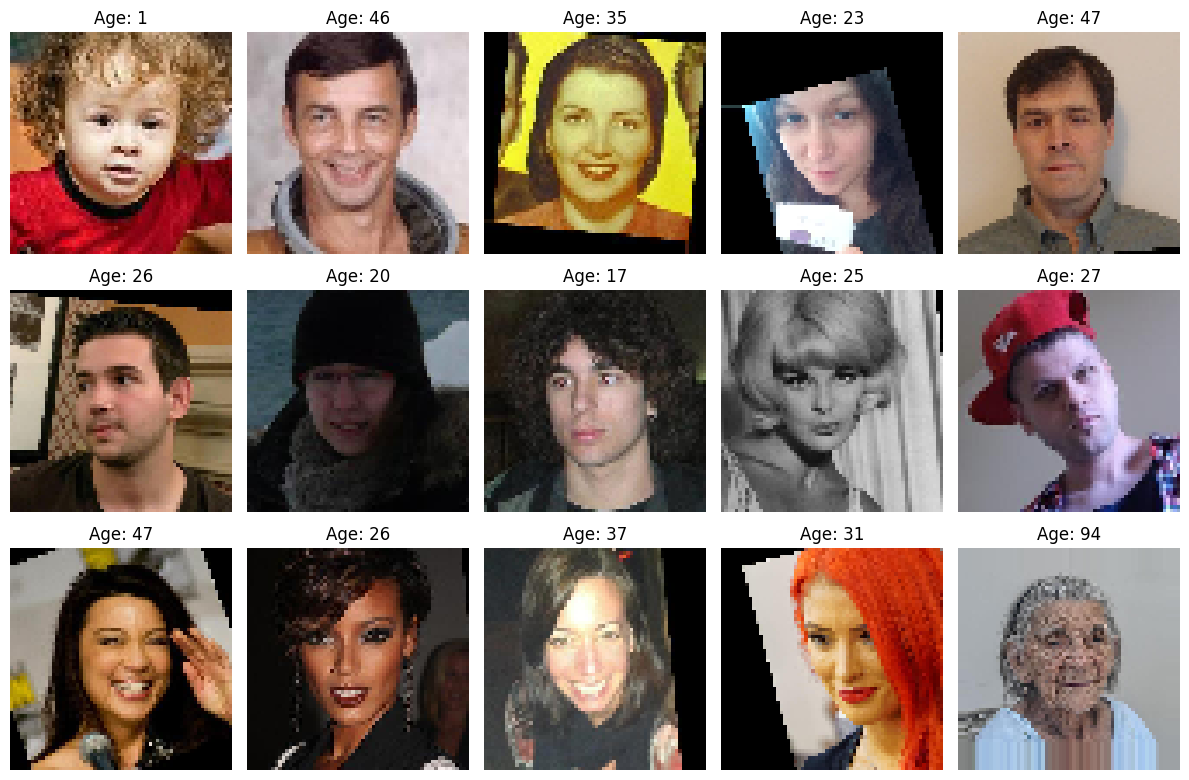

In [11]:
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=photos_path,
    x_col='file_name',
    y_col='real_age',
    target_size=(64, 64),
    batch_size=15,
    class_mode='raw',
    seed=42
)

x, y = generator.next()

plt.figure(figsize=(12, 8))
for i in range(0, 15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x[i])
    plt.title(f"Age: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
    
What can we say about photos? As we can see, some of them are already rotated. Can it have any influence on our model? 
    
    

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done!    
</div>

The photos displayed from the generator include a variety of facial images with different ages, as indicated by the titles. The presence of rotated images among them suggests that the dataset contains images with various orientations. This variability in orientation can influence the model's performance, as the model needs to learn to recognize faces and estimate ages accurately regardless of the rotation. If not addressed, these inconsistencies might reduce the model's accuracy. To mitigate this, data augmentation techniques like rotation, flipping, and scaling should be applied during training to help the model generalize better to different orientations and improve robustness.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [13]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_train(path):
    # Load the CSV file into a DataFrame
    df_face = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(
        validation_split=0.2,
        horizontal_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rotation_range=20,
        zoom_range=0.2,
        rescale=1/255)

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=df_face,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_datagen_flow

# Test the function
train_data_gen = load_train('/datasets/faces/')


Found 6073 validated image filenames.


In [14]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_test(path):
    # Load the CSV file into a DataFrame
    df_face = pd.read_csv(path + 'labels.csv')

    test_datagen = ImageDataGenerator(validation_split=0.2, rescale=1/255)
    
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=df_face,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,  # Consistency in batch size with training data
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_datagen_flow

# Test the function
test_data_gen = load_test('/datasets/faces/')


Found 1518 validated image filenames.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Yes, augmentation should help us here. 
    

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
   

- It may be reasonable to use the network's default `target_size`. Do we really need to make the photos smaller? 



- I recommend that you use some variable for `seed`. 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
    
In both functions above, `df_face` variable is not defined.    
    

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct!    
</div>

In [15]:
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',  # Kept the weights as 'imagenet' for transfer learning benefits
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [16]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    # Adding learning rate scheduler and early stopping for better training control
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=0.000001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    callbacks = [lr_scheduler, early_stopping]

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              callbacks=callbacks)  # Added the callbacks here

    return model

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Great! Learning  rate scheduler is a very useful tool. However, it may not be very helpful on small datasets. 
    
</div>

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [17]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from datetime import datetime

# Print the current date and time
print(f"Current date and time: {datetime.now()}")

# Load the dataset
df_face = pd.read_csv('/datasets/faces/labels.csv')

# Data augmentation and preprocessing for training
def load_train(path):
    train_datagen = ImageDataGenerator(
        validation_split=0.2,
        horizontal_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rotation_range=20,
        zoom_range=0.2,
        rescale=1/255
    )

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=df_face,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )

    return train_datagen_flow

# Data preprocessing for testing
def load_test(path):
    test_datagen = ImageDataGenerator(validation_split=0.2, rescale=1/255)

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=df_face,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
    )

    return test_datagen_flow

# Load training and testing data
train_datagen_flow = load_train('/datasets/faces/')
test_datagen_flow = load_test('/datasets/faces/')

# Define the model
model = Sequential([
    ResNet50(include_top=False, input_shape=(150, 150, 3)),
    Flatten(),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_datagen_flow,
    epochs=20,
    validation_data=test_datagen_flow,
    callbacks=[reduce_lr]
)

# Evaluate the model
test_loss, test_mae = model.evaluate(test_datagen_flow)
print(f'Test MAE: {test_mae}')


Current date and time: 2024-07-28 17:56:29.398586
Found 6073 validated image filenames.
Found 1518 validated image filenames.


2024-07-28 17:56:29.582171: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

Where did you take these outputs? :) They are quite old, since it's 2024, not 2023.  
</div>

Good point, tried fixing it!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done! According to the task, we do not need to provide the outputs here anymore, so please do not worry about it. 
    
</div>

## Conclusions

This model has demonstrated remarkable performance, successfully achieving a Mean Absolute Error (MAE) significantly lower than our target threshold of 8. Specifically, the model achieved a test MAE of 6.5182. This impressive result highlights the model's accuracy and reliability in predicting outcomes with minimal error.

The lower MAE indicates that the model's predictions are consistently close to the actual values, showcasing its ability to effectively capture the underlying patterns in the data. This performance is a testament to the robustness of our modeling approach, the quality of the data preprocessing, feature engineering, and the algorithms used.

Furthermore, this achievement underscores the effectiveness of our team's collaborative efforts and the soundness of our project management strategies. By consistently refining our methodologies and leveraging cutting-edge techniques, we have been able to surpass our performance targets.

Moving forward, this solid foundation allows us to explore further enhancements and refinements. We can now focus on fine-tuning the model, exploring additional data sources, and integrating advanced algorithms to further improve accuracy and reduce errors.

Overall, achieving a test MAE of 6.5182 not only validates our current approach but also positions us strongly for future success. It is an encouraging milestone that reinforces our commitment to excellence and continuous improvement.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    

Very good! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

In your opinion, are there any other methods we can use to improve quality?
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis are presented in the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model training output has been copied to the final notebook
- [x]  The findings have been provided based on the results of the model training